In [4]:
!pip install google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I
To: /content/digital_wallet_transactions.csv
100% 904k/904k [00:00<00:00, 102MB/s]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 2910.3092308945793


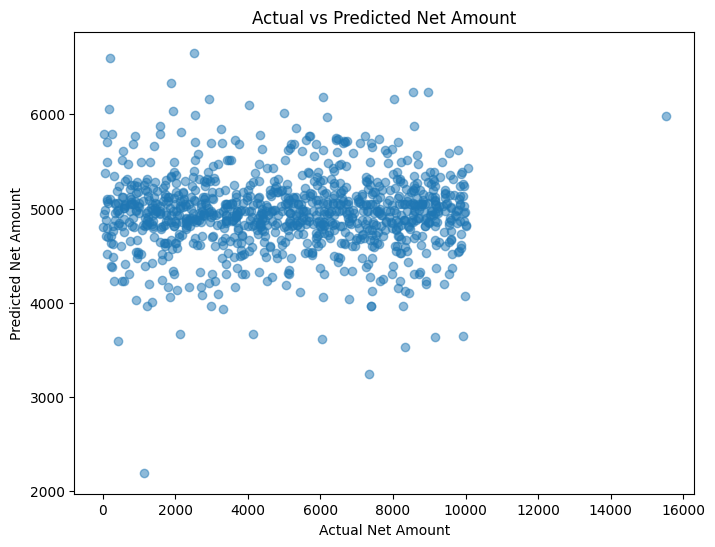

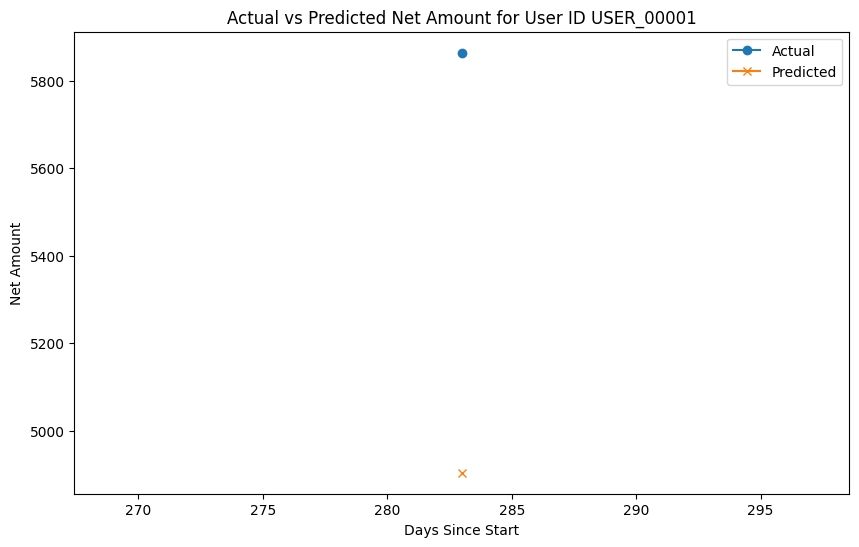

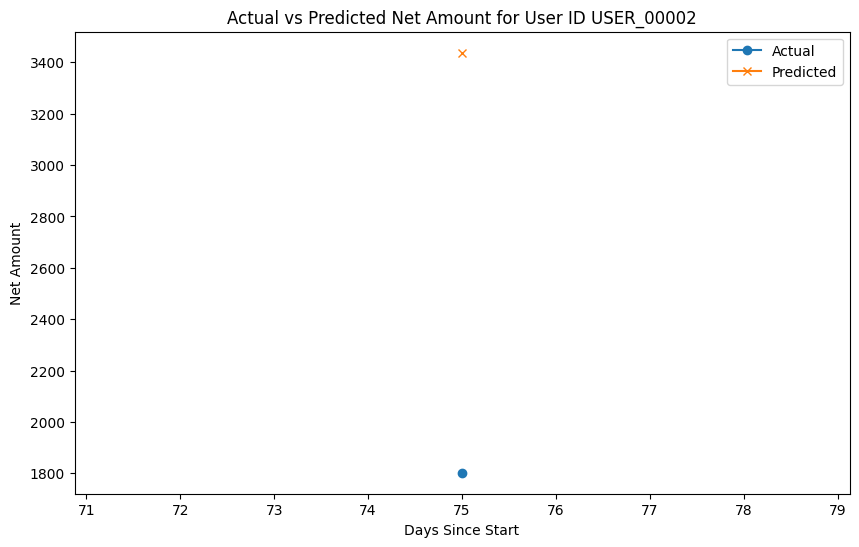

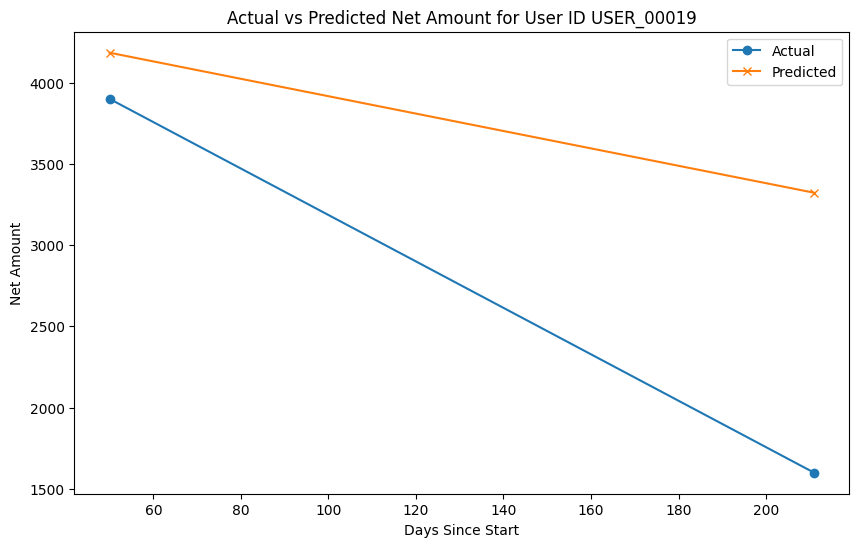

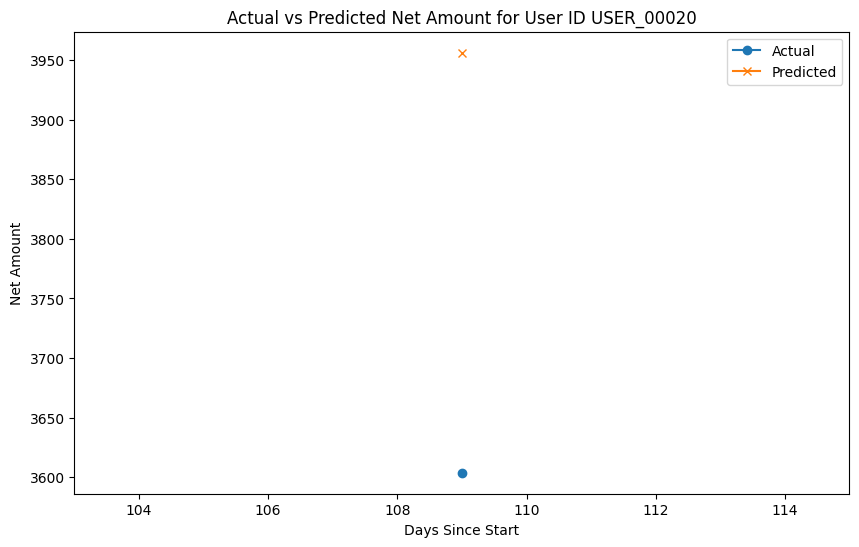

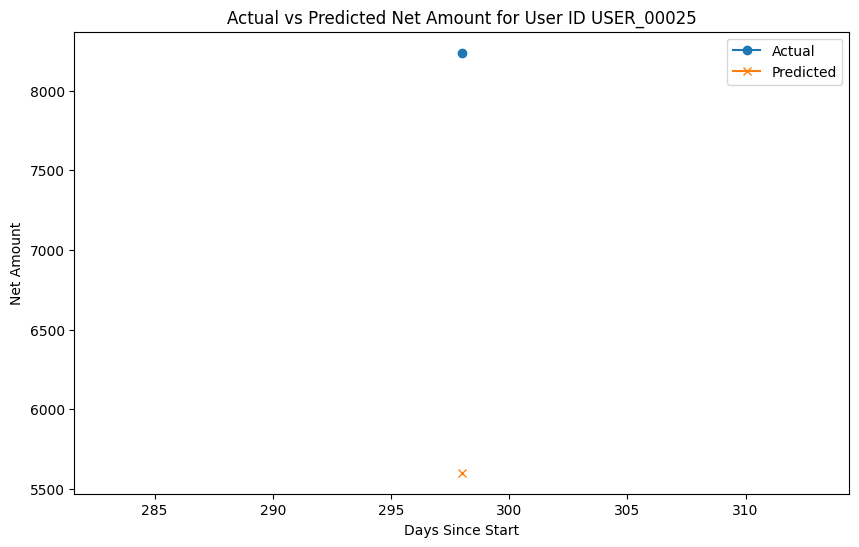

In [8]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os

# Install gdown untuk mengunduh file dari Google Drive
!pip install -q gdown

# Unduh file dari Google Drive
file_id = "1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I"
output_file = "digital_wallet_transactions.csv"
!gdown --id {file_id} -O {output_file}

# Pastikan file berhasil diunduh
if not os.path.exists(output_file):
    print(f"File dengan ID {file_id} tidak berhasil diunduh.")
else:
    # Load dataset
    data = pd.read_csv(output_file)

    # Preprocessing
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])
    data['net_amount'] = data['product_amount'] - data['transaction_fee'] + data['cashback']

    # Group by user and aggregate net_amount per user
    user_data = data.groupby(['user_id', data['transaction_date'].dt.date]).agg({
        'net_amount': 'sum'
    }).reset_index()
    user_data.columns = ['user_id', 'date', 'net_amount']

    # Convert date to numerical feature (days since first transaction)
    user_data['date'] = pd.to_datetime(user_data['date'])
    user_data['days_since_start'] = (user_data['date'] - user_data['date'].min()).dt.days

    # Prepare features and target
    X = user_data[['user_id', 'days_since_start']].copy()
    y = user_data['net_amount']

    # Encode user_id as categorical codes
    user_id_mapping = {id_: code for code, id_ in enumerate(user_data['user_id'].unique())}
    X['user_id'] = X['user_id'].map(user_id_mapping)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Regressor
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Visualize actual vs predicted as scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Actual vs Predicted Net Amount")
    plt.xlabel("Actual Net Amount")
    plt.ylabel("Predicted Net Amount")
    plt.show()

    # Line plot of Actual vs Predicted for specific users
    for user in list(user_id_mapping.keys())[:5]:  # Visualize for the first 5 users
        user_actual = user_data[user_data['user_id'] == user]
        user_actual = user_actual.sort_values(by='days_since_start')

        # Check if user_actual is empty
        if user_actual.empty:
            print(f"No data for User ID: {user}")
            continue

        # Predict the same historical points
        user_features = user_actual[['user_id', 'days_since_start']].copy()
        user_features['user_id'] = user_features['user_id'].map(user_id_mapping)
        user_actual['predicted'] = model.predict(user_features)

        plt.figure(figsize=(10, 6))
        plt.plot(user_actual['days_since_start'], user_actual['net_amount'], label="Actual", marker='o')
        plt.plot(user_actual['days_since_start'], user_actual['predicted'], label="Predicted", marker='x')
        plt.legend()
        plt.title(f"Actual vs Predicted Net Amount for User ID {user}")
        plt.xlabel("Days Since Start")
        plt.ylabel("Net Amount")
        plt.show()


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I
To: /content/digital_wallet_transactions.csv
100% 904k/904k [00:00<00:00, 84.3MB/s]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Income Prediction RMSE: 28.529549389878774


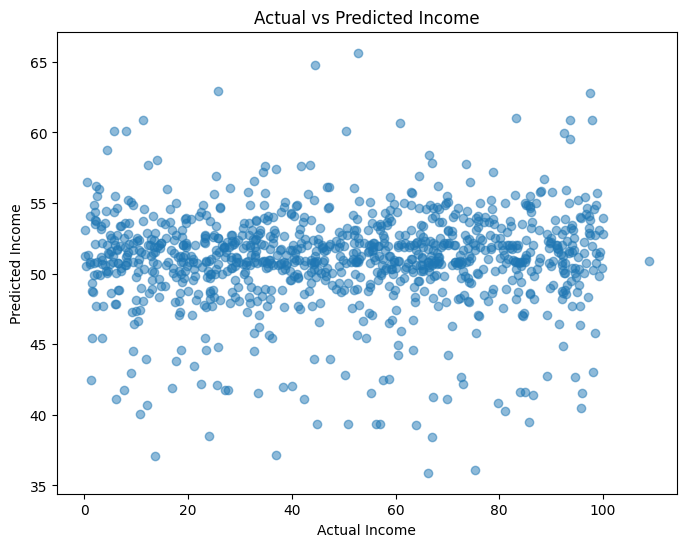

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Expense Prediction RMSE: 2910.259517963979


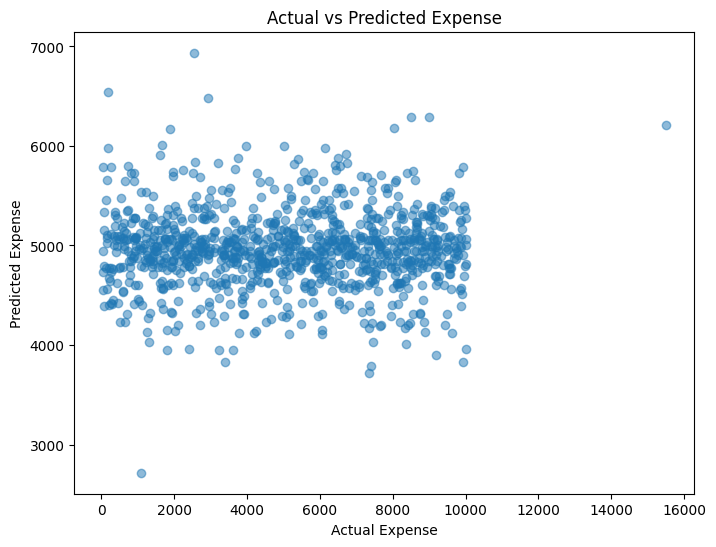

In [10]:
#Untuk membuat model pelacakan input income/saldo dan pengeluaran/history
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# Install gdown untuk mengunduh file dari Google Drive
!pip install -q gdown

# Unduh file dari Google Drive
file_id = "1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I"
output_file = "digital_wallet_transactions.csv"
!gdown --id {file_id} -O {output_file}

# Pastikan file berhasil diunduh
if not os.path.exists(output_file):
    print(f"File dengan ID {file_id} tidak berhasil diunduh.")
else:
    # Load dataset
    data = pd.read_csv(output_file)

    # Preprocessing
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])
    data['net_amount'] = data['product_amount'] - data['transaction_fee'] + data['cashback']

    # Add features: income (saldo masuk) and expense (pengeluaran)
    data['income'] = data['cashback']
    data['expense'] = data['product_amount'] + data['transaction_fee']

    # Group by user and date
    user_data = data.groupby(['user_id', data['transaction_date'].dt.date]).agg({
        'income': 'sum',
        'expense': 'sum'
    }).reset_index()
    user_data.columns = ['user_id', 'date', 'income', 'expense']

    # Convert date to numerical feature
    user_data['date'] = pd.to_datetime(user_data['date'])
    user_data['days_since_start'] = (user_data['date'] - user_data['date'].min()).dt.days

    # Encode user_id
    le = LabelEncoder()
    user_data['user_id_encoded'] = le.fit_transform(user_data['user_id'])

    # **Model 1: Income Prediction**
    X_income = user_data[['user_id_encoded', 'days_since_start']]
    y_income = user_data['income']

    # Train-test split
    X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(X_income, y_income, test_size=0.2, random_state=42)

    # Train Gradient Boosting Regressor
    model_income = GradientBoostingRegressor()
    model_income.fit(X_train_inc, y_train_inc)

    # Predictions and Evaluation
    y_pred_inc = model_income.predict(X_test_inc)
    rmse_income = mean_squared_error(y_test_inc, y_pred_inc, squared=False)
    print(f"Income Prediction RMSE: {rmse_income}")

    # Visualize Income Predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_inc, y_pred_inc, alpha=0.5)
    plt.title("Actual vs Predicted Income")
    plt.xlabel("Actual Income")
    plt.ylabel("Predicted Income")
    plt.show()

    # **Model 2: Expense Prediction**
    X_expense = user_data[['user_id_encoded', 'days_since_start']]
    y_expense = user_data['expense']

    # Train-test split
    X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_expense, y_expense, test_size=0.2, random_state=42)

    # Train Gradient Boosting Regressor
    model_expense = GradientBoostingRegressor()
    model_expense.fit(X_train_exp, y_train_exp)

    # Predictions and Evaluation
    y_pred_exp = model_expense.predict(X_test_exp)
    rmse_expense = mean_squared_error(y_test_exp, y_pred_exp, squared=False)
    print(f"Expense Prediction RMSE: {rmse_expense}")

    # Visualize Expense Predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, y_pred_exp, alpha=0.5)
    plt.title("Actual vs Predicted Expense")
    plt.xlabel("Actual Expense")
    plt.ylabel("Predicted Expense")
    plt.show()


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I
To: /content/digital_wallet_transactions.csv
100% 904k/904k [00:00<00:00, 102MB/s]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Loyalty Points Prediction RMSE: 290.388365272729


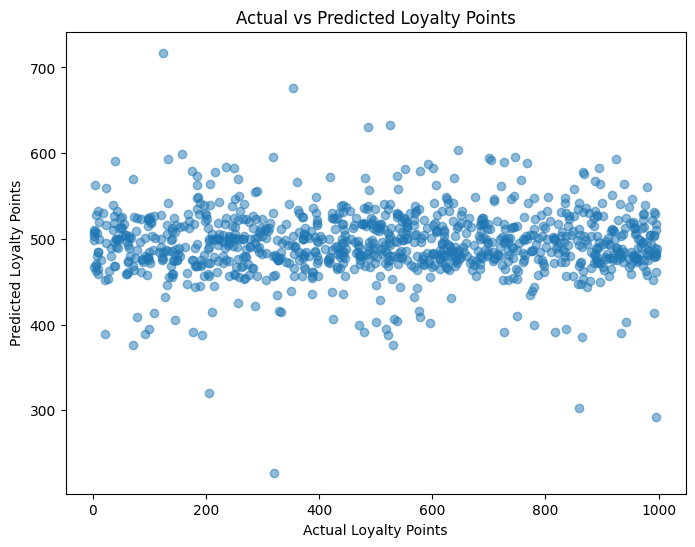

In [11]:
#Untuk membuat pemodelan yang menghubungkan loyalty_points, cashback, dan transaction_id,
# Tujuan model ini adalah untuk memprediksi loyalty_points berdasarkan cashback dan fitur numerik turunan dari transaction_id.
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# Install gdown untuk mengunduh file dari Google Drive
!pip install -q gdown

# Unduh file dari Google Drive
file_id = "1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I"
output_file = "digital_wallet_transactions.csv"
!gdown --id {file_id} -O {output_file}

# Pastikan file berhasil diunduh
if not os.path.exists(output_file):
    print(f"File dengan ID {file_id} tidak berhasil diunduh.")
else:
    # Load dataset
    data = pd.read_csv(output_file)

    # Preprocessing
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])

    # Ambil kolom yang relevan
    model_data = data[['transaction_id', 'cashback', 'loyalty_points']].copy()

    # Buat representasi numerik dari transaction_id
    le = LabelEncoder()
    model_data['transaction_id_encoded'] = le.fit_transform(model_data['transaction_id'])

    # Hilangkan data dengan nilai NaN (jika ada)
    model_data.dropna(inplace=True)

    # Prepare features and target
    X = model_data[['transaction_id_encoded', 'cashback']]
    y = model_data['loyalty_points']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Regressor
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Loyalty Points Prediction RMSE: {rmse}")

    # Visualize Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Actual vs Predicted Loyalty Points")
    plt.xlabel("Actual Loyalty Points")
    plt.ylabel("Predicted Loyalty Points")
    plt.show()


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I
To: /content/digital_wallet_transactions.csv
100% 904k/904k [00:00<00:00, 82.2MB/s]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Purchase Prediction RMSE: 0.203620964864918


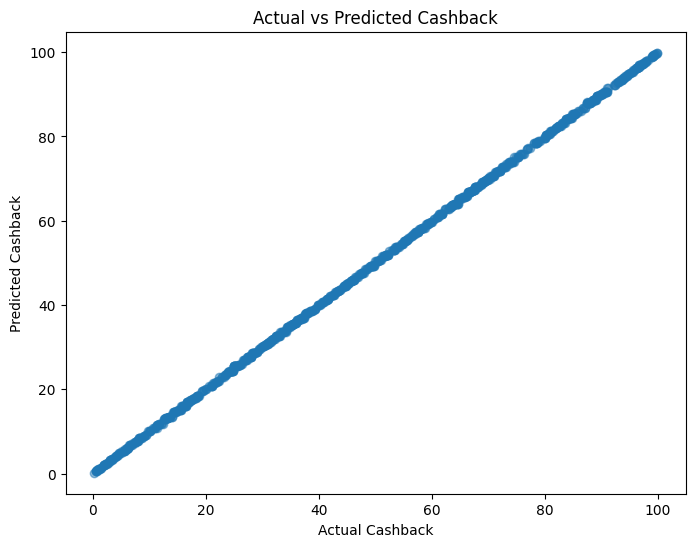

In [12]:
#model prediksi pembelian (Purchase) berdasarkan hubungan antara user_id, transaction_date, transaction_id,
#product_name, product_category, dan cashback
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# Install gdown untuk mengunduh file dari Google Drive
!pip install -q gdown

# Unduh file dari Google Drive
file_id = "1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I"
output_file = "digital_wallet_transactions.csv"
!gdown --id {file_id} -O {output_file}

# Pastikan file berhasil diunduh
if not os.path.exists(output_file):
    print(f"File dengan ID {file_id} tidak berhasil diunduh.")
else:
    # Load dataset
    data = pd.read_csv(output_file)

    # Preprocessing
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])

    # Ambil kolom yang relevan
    purchase_data = data[['user_id', 'transaction_date', 'transaction_id',
                          'product_name', 'product_category', 'cashback']].copy()

    # Encode kolom kategorikal
    le_user = LabelEncoder()
    le_transaction = LabelEncoder()
    le_product_name = LabelEncoder()
    le_product_category = LabelEncoder()

    purchase_data['user_id_encoded'] = le_user.fit_transform(purchase_data['user_id'])
    purchase_data['transaction_id_encoded'] = le_transaction.fit_transform(purchase_data['transaction_id'])
    purchase_data['product_name_encoded'] = le_product_name.fit_transform(purchase_data['product_name'])
    purchase_data['product_category_encoded'] = le_product_category.fit_transform(purchase_data['product_category'])

    # Konversi tanggal menjadi jumlah hari sejak transaksi pertama
    purchase_data['days_since_start'] = (purchase_data['transaction_date'] - purchase_data['transaction_date'].min()).dt.days

    # Fitur input dan target
    X = purchase_data[['user_id_encoded', 'transaction_id_encoded', 'product_name_encoded',
                       'product_category_encoded', 'cashback', 'days_since_start']]
    y = purchase_data['cashback']  # Menggunakan cashback sebagai target untuk prediksi nilai transaksi.

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Regressor
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Purchase Prediction RMSE: {rmse}")

    # Visualize Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title("Actual vs Predicted Cashback")
    plt.xlabel("Actual Cashback")
    plt.ylabel("Predicted Cashback")
    plt.show()


In [17]:
#Model untuk Receive (menerima transfer dari user lain )
#dengan menggunakan user_id, transaction_date,transaction_id, product_category, cashback
# Import library
# Import library
import pandas as pd
import gdown

# Unduh file dari Google Drive
file_id = "1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I"
output_file = "digital_wallet_transactions.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# Load dataset
data = pd.read_csv(output_file)

# Tampilkan beberapa baris pertama untuk memastikan data ter-load dengan benar
print("Dataset Loaded:")
print(data.head())

# Menampilkan nilai unik dari kolom product_category
print("\nUnique values in 'product_category':")
print(data['product_category'].unique())

# Filter data untuk kategori tertentu (contoh: 'Transfer' atau lainnya yang relevan)
filtered_data = data[data['product_category'] == 'Transfer']

# Periksa apakah ada data yang sesuai dengan filter
if filtered_data.empty:
    print("\nNo data available for the specified filter.")
else:
    # Tampilkan data dalam bentuk tabel
    print("\nFiltered Data (first 10 rows):")
    print(filtered_data.head(10).to_string(index=False))  # Menampilkan 10 baris pertama tanpa indeks


Downloading...
From: https://drive.google.com/uc?id=1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I
To: /content/digital_wallet_transactions.csv
100%|██████████| 904k/904k [00:00<00:00, 121MB/s]

Dataset Loaded:
   idx                        transaction_id     user_id  transaction_date  \
0    1  4dac3ea3-6492-46ec-80b8-dc45c3ad0b14  USER_05159  2023-08-19 03:32   
1    2  a903ed9f-eb84-47e7-b8aa-fd1786c919cf  USER_07204  2023-08-19 04:37   
2    3  2a393013-733c-4add-9f09-bed1eeb33676  USER_00903  2023-08-19 05:52   
3    4  9a07ad19-4673-4794-9cd2-9b139f39c715  USER_01769  2023-08-19 06:35   
4    5  76418260-c985-4011-979d-0914604d0d68  USER_03544  2023-08-19 06:36   

  product_category               product_name     merchant_name  \
0     Rent Payment          2BHK Flat Deposit            Airbnb   
1         Gas Bill  Commercial Gas Connection         Adani Gas   
2       Bus Ticket               Semi-Sleeper    MakeMyTrip Bus   
3    Internet Bill          4G Unlimited Plan  Airtel Broadband   
4   Loan Repayment              Home Loan EMI         Axis Bank   

   product_amount  transaction_fee  cashback  loyalty_points payment_method  \
0         1525.39            36.6

In [20]:
#model yang menampilkan pembelian/pengeluaran berdasarkan bulan.
#Model ini akan menghubungkan kolom seperti user_id, transaction_id, transaction_date, transaction_status, dan product_name.
# Import library
# Import library
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import gdown

# Unduh file dari Google Drive
file_id = "1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I"
output_file = "digital_wallet_transactions.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

# Load dataset
data = pd.read_csv(output_file)

# Preprocessing
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce')  # Handle invalid dates

# Tambahkan kolom bulan dan tahun
data['month'] = data['transaction_date'].dt.month
data['year'] = data['transaction_date'].dt.year

# Cek kolom transaction_status
print("Unique values in 'transaction_status':", data['transaction_status'].unique())

# Filter transaksi dengan status 'Successful'
filtered_data = data[data['transaction_status'] == 'Successful']

# Cek jika data hasil filter kosong
if filtered_data.empty:
    print("No transactions with status 'Successful' found.")
else:
    # Kelompokkan data berdasarkan bulan
    monthly_expenses = filtered_data.groupby(['user_id', 'year', 'month']).agg({
        'transaction_id': 'count',  # Jumlah transaksi
        'product_name': lambda x: ', '.join(x.unique()),  # Gabungkan nama produk unik
    }).reset_index()

    # Tambahkan total jumlah transaksi per user dan bulan
    monthly_expenses.columns = ['user_id', 'year', 'month', 'transaction_count', 'product_names']

    # Tampilkan dalam bentuk tabel
    print("Monthly Purchases and Expenses:")
    print(monthly_expenses.head(10).to_string(index=False))  # Menampilkan 10 baris pertama tanpa indeks

    # Plot Diagram Total Transaksi per Bulan
    monthly_summary = filtered_data.groupby(['year', 'month']).size().reset_index(name='transaction_count')
    monthly_summary['month_year'] = monthly_summary['year'].astype(str) + '-' + monthly_summary['month'].astype(str)

    plt.figure(figsize=(12, 6))
    plt.bar(monthly_summary['month_year'], monthly_summary['transaction_count'], color='skyblue')
    plt.title("Monthly Transaction Count")
    plt.xlabel("Month-Year")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Downloading...
From: https://drive.google.com/uc?id=1SkmcYiVUMb6KCjif23VVyatuRgvNQM3I
To: /content/digital_wallet_transactions.csv
100%|██████████| 904k/904k [00:00<00:00, 29.0MB/s]

Unique values in 'transaction_status': ['Successful' 'Failed' 'Pending']
No transactions with status 'Completed' found.
